In [307]:
import osmnx as ox
import numpy as np

place_name = "Пермь Индустриальный Район"

In [308]:
buildings_df = ox.footprints_from_place(place_name)

Самый распространенный тип объекта в заданном регионе - convenience
Их количество = 16
Минимальное количество объектов типа:
department_store = 1
greengrocer = 1
variety_store = 1
hardware = 1
furniture = 1
clothes = 1
hairdresser = 1
tyres = 1


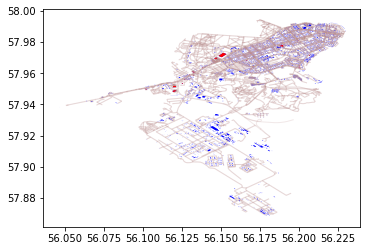

In [309]:
building_shop_names_list = ['kiosk', 'retail', 'supermarket']
shop_series, df_list = count_services(buildings_df, 'shop', building_shop_names_list)
give_advice(shop_series)
draw_plot(place_name, buildings_df, df_list, 'shops')

Самый распространенный тип объекта в заданном регионе - sauna
Их количество = 4
Минимальное количество объектов типа:
resort = 3
sports_centre = 3


/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:507: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


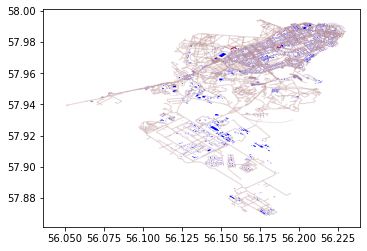

In [310]:
building_sport_names_list = ['grandstand', 'pavilion', 'riding_hall', 'sports_hall', 'stadium']
sport_series, sport_df_list = count_services(buildings_df, 'leisure', building_sport_names_list)
give_advice(sport_series)
draw_plot(place_name, buildings_df, sport_df_list, 'sports')

Самый распространенный тип объекта в заданном регионе - community_centre
Их количество = 1
Минимальное количество объектов типа:
community_centre = 1
cinema = 1
nightclub = 1


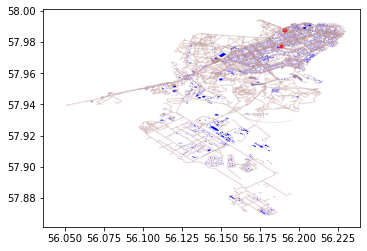

In [311]:
# все услуги
entertainment = ['arts_centre', 'brothel', 'casino', 'cinema', 'community_centre',
                 'fountain', 'gambling', 'nightclub', 'planetarium', 'public_bookcase', 
                 'social_centre', 'stripclub', 'studio', 'swingerclub', 'theatre']
amenity_df = ox.pois_from_place(place_name, amenities=entertainment)
#amenity_df = ox.pois_from_place(place_name)
amenity_series = amenity_df['amenity'].value_counts()
give_advice(amenity_series)
draw_plot(place_name, buildings_df, [amenity_df], 'all_amenities')

In [312]:
def count_services(buildings_df, service_name, building_service_names):
    needed_columns = ['building', 'name', service_name, 'amenity']
    service_df = buildings_df.dropna(subset=[service_name])
    building_service_df = buildings_df.loc[buildings_df['building'].isin(building_service_names)]
    final_service_df = service_df[needed_columns].merge(building_service_df[needed_columns],
                                                    how='outer').reset_index(drop=True)
    service_types_list = []
    for i, row in final_service_df.iterrows():
        if not pd.isnull(row[service_name]):
            service_types_list.append(row[service_name])
        elif not pd.isnull(row['building']):
            service_types_list.append(row['building'])
    final_series = pd.Series(service_types_list).value_counts()
    return final_series, [service_df, building_service_df]

In [313]:
def give_advice(input_series):
    print('Самый распространенный тип объекта в заданном регионе - {0}'.format(input_series.idxmax()))
    print('Их количество = {}'.format(input_series.max()))
    print('Минимальное количество объектов типа:')
    for key, value in dict(input_series).items():
        if value == input_series.min():
            print(key, '=', value)

In [314]:
def draw_plot(place_name, buildings_df, service_df_list, service_name):
    area = ox.gdf_from_place(place_name)
    graph = ox.graph_from_place(place_name)
    nodes, edges = ox.graph_to_gdfs(graph)
    ax = area.plot(facecolor='white')
    ax = edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F', alpha=0.2)
    ax = buildings_df.plot(ax=ax, facecolor='blue', alpha=1)
    for df in service_df_list:
        ax = df.plot(ax=ax, color='red', alpha=1, markersize=10)
    ax.figure.savefig('{}.png'.format(service_name))